In [6]:
from keras.datasets import cifar10
from dlhub_client import client
import matplotlib.pyplot as plt

def plot_cifar(X, y=None, width=3, height=3):
    f, (axes) = plt.subplots(width,height, sharex=True, sharey=True)

    image_index = 0
    for i in range(0,width):
        for j in range(0,height):
            axes[i][j].imshow(X[image_index],interpolation='bicubic')
            axes[i][j].set_title('%s'%(y[image_index]),fontsize =10)
            image_index += 1

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
n_predict = 9 # Tested safely on 50 (entire file is 10,000 images)

dl = client.DLHub()
cifar_id = "c12c7a90-2772-4412-bad0-1f651c5a092c" # Hard code until names get corrected in the table

data = {"data":x_test[0:n_predict].tolist()}
res = dl.run(cifar_id, data)

In [8]:
res

,0,1,2,3,4,5,6,7,8,9
0,{'cat': 0.9999053478240967},{'dog': 5.8182569773634896e-05},{'frog': 9.716581189422868e-06},{'bird': 7.796190402586944e-06},{'airplane': 6.708351975248661e-06},{'ship': 5.635277375404257e-06},{'deer': 3.482989541225834e-06},{'horse': 1.232541649187624e-06},{'automobile': 1.1086395943493699e-06},{'truck': 9.252383392777119e-07}
1,{'ship': 0.9996776580810547},{'automobile': 0.00021951385133434087},{'airplane': 3.764453504118137e-05},{'cat': 1.864330806711223e-05},{'dog': 1.8353413906879723e-05},{'truck': 1.528265784145333e-05},{'bird': 4.4118523874203674e-06},{'frog': 3.6485205328062875e-06},{'horse': 3.435809958318714e-06},{'deer': 1.393554157402832e-06}
2,{'ship': 0.9982878565788269},{'automobile': 0.0014107364695519209},{'airplane': 9.71987028606236e-05},{'bird': 4.473697117646225e-05},{'horse': 4.4257831177674234e-05},{'truck': 4.296072438592091e-05},{'dog': 3.562564597814344e-05},{'frog': 2.0830115317949094e-05},{'cat': 9.198003681376576e-06},{'deer': 6.543906238221098e-06}
3,{'airplane': 0.9997767806053162},{'cat': 8.851669554132968e-05},{'bird': 4.969984365743585e-05},{'ship': 4.363008702057414e-05},{'deer': 1.5377027011709288e-05},{'truck': 1.2020126632705797e-05},{'dog': 8.08627919468563e-06},{'automobile': 3.1964182198862545e-06},{'frog': 1.9419176169321872e-06},{'horse': 7.743340688648459e-07}
4,{'frog': 0.9999275207519531},{'bird': 3.351091072545387e-05},{'cat': 9.10602648218628e-06},{'automobile': 8.13092992757447e-06},{'dog': 7.873893082432915e-06},{'ship': 4.196899226371897e-06},{'airplane': 2.9024811283306917e-06},{'horse': 2.863822373910807e-06},{'truck': 2.3171644443209516e-06},{'deer': 1.483567984905676e-06}
5,{'frog': 0.99980229139328},{'cat': 9.442900045542046e-05},{'dog': 5.620766751235351e-05},{'truck': 1.0569672667770647e-05},{'horse': 8.80375228007324e-06},{'bird': 8.747579158807639e-06},{'automobile': 5.320835498423548e-06},{'ship': 4.974646799382754e-06},{'deer': 4.696068572229706e-06},{'airplane': 4.1674516069178935e-06}
6,{'automobile': 0.9989954829216003},{'truck': 0.0007788331713527441},{'dog': 9.791163756744936e-05},{'cat': 9.195605525746942e-05},{'airplane': 1.0936127182503697e-05},{'bird': 1.0033439139078837e-05},{'ship': 5.788999260403216e-06},{'horse': 4.78941456094617e-06},{'frog': 2.2566680399904726e-06},{'deer': 1.9768699530686717e-06}
7,{'frog': 0.9997634291648865},{'cat': 9.510204108664766e-05},{'truck': 4.8179790610447526e-05},{'deer': 1.9417797375353985e-05},{'dog': 1.75850964296842e-05},{'bird': 1.723209788906388e-05},{'airplane': 1.600779614818748e-05},{'ship': 9.187464456772432e-06},{'horse': 8.560547030356247e-06},{'automobile': 5.327605322236195e-06}
8,{'cat': 0.9999042749404907},{'dog': 4.22538178099785e-05},{'deer': 1.542665449960623e-05},{'horse': 8.719767720322125e-06},{'ship': 8.550328857381828e-06},{'frog': 6.126399057393428e-06},{'airplane': 5.974017767584883e-06},{'truck': 4.2704887164290994e-06},{'bird': 3.2084810754895443e-06},{'automobile': 1.1619030146903242e-06}


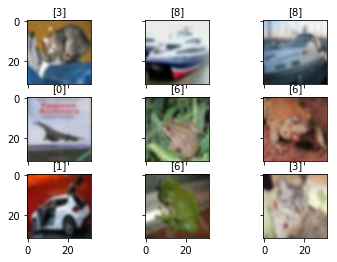

In [7]:
plot_cifar(x_test, y_test)